Q1. Explain the concept of R-squared in linear regression models. How is it calculated, and what does it
represent?

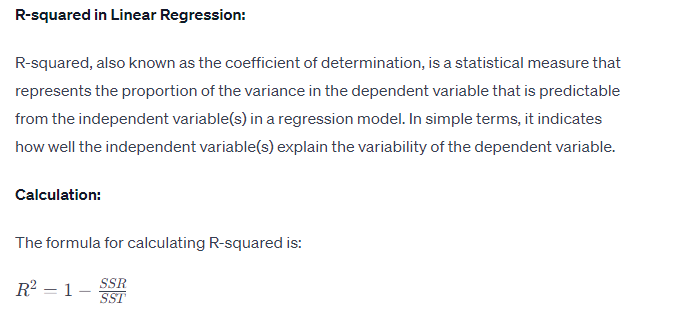
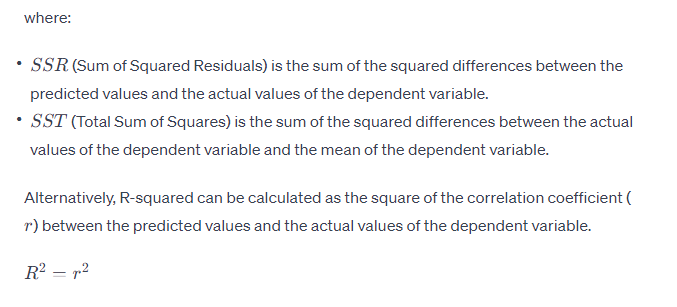
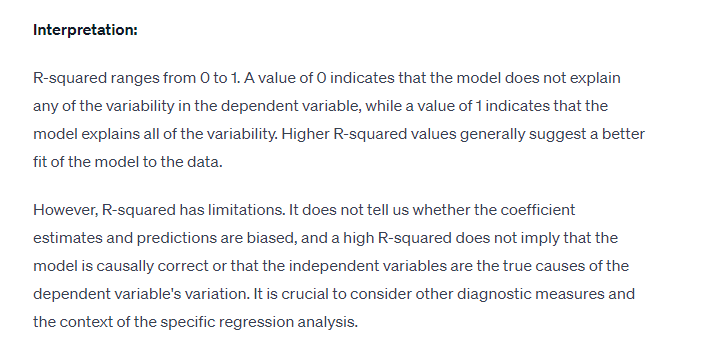

Q2. Define adjusted R-squared and explain how it differs from the regular R-squared.

Ans - 
Adjusted R-squared:

Adjusted R-squared is a modified version of the regular R-squared that takes into account the number of predictors (independent variables) in a regression model. While R-squared provides a measure of how well the independent variables explain the variability in the dependent variable, adjusted R-squared adjusts this measure to penalize the inclusion of irrelevant variables that do not significantly contribute to the explanation of the dependent variable.

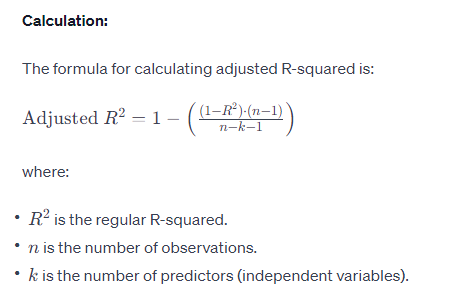



**Differences:**

1. **Inclusion of Variables:**
   - Regular R-squared tends to increase as more predictors are added to the model, even if those predictors do not significantly improve the model's explanatory power.
   - Adjusted R-squared adjusts for the number of predictors, penalizing the inclusion of irrelevant variables. It increases only if the new variable contributes significantly to the model.

2. **Model Parsimony:**
   - Regular R-squared does not consider the complexity or parsimony of the model.
   - Adjusted R-squared encourages the use of a more parsimonious model (a model with fewer variables) by penalizing the inclusion of unnecessary variables that do not add explanatory power.

3. **Comparison of Models:**
   - When comparing models with different numbers of predictors, adjusted R-squared is often more informative as it accounts for model complexity.
   - Regular R-squared may favor a model with more predictors even if they do not add much explanatory power.

In summary, while regular R-squared assesses how well the model fits the data, adjusted R-squared provides a more nuanced evaluation by considering the trade-off between model fit and model complexity. It is a valuable tool for selecting a model that strikes a balance between explanatory power and simplicity.

Q3. When is it more appropriate to use adjusted R-squared?

Ans - Adjusted R-squared is more appropriate to use in situations where you want to account for the number of predictors (independent variables) in a regression model and obtain a more nuanced measure of model performance. Here are some scenarios where adjusted R-squared is particularly useful:

1. **Comparing Models with Different Numbers of Predictors:**
   - Adjusted R-squared is valuable when comparing models with different numbers of predictors. It penalizes the inclusion of irrelevant variables, helping you assess whether adding more predictors actually improves the model's explanatory power.

2. **Model Selection:**
   - When you have multiple candidate models, adjusted R-squared aids in model selection. It encourages the selection of a more parsimonious model (one with fewer predictors) if the additional predictors do not contribute significantly to explaining the variability in the dependent variable.

3. **Avoiding Overfitting:**
   - Overfitting occurs when a model fits the training data too closely, capturing noise rather than the underlying patterns. Adjusted R-squared is useful for avoiding overfitting by penalizing the inclusion of unnecessary variables that might lead to a high regular R-squared but do not generalize well to new data.

4. **Complex Models:**
   - In situations where the number of predictors is relatively high compared to the number of observations, adjusted R-squared is more appropriate. It helps guard against inflated regular R-squared values that may result from overfitting in such complex models.

5. **Emphasizing Model Parsimony:**
   - If you value simplicity and want a model that is easy to interpret and apply, adjusted R-squared provides a measure that encourages parsimony. It discourages the inclusion of predictors that do not significantly enhance the model's explanatory power.

In summary, adjusted R-squared is particularly useful when you need a measure of model performance that considers both the goodness of fit and the complexity of the model. It is a valuable tool for selecting models that strike a balance between explanatory power and simplicity, especially in situations involving model comparison and selection.

Q4. What are RMSE, MSE, and MAE in the context of regression analysis? How are these metrics
calculated, and what do they represent?

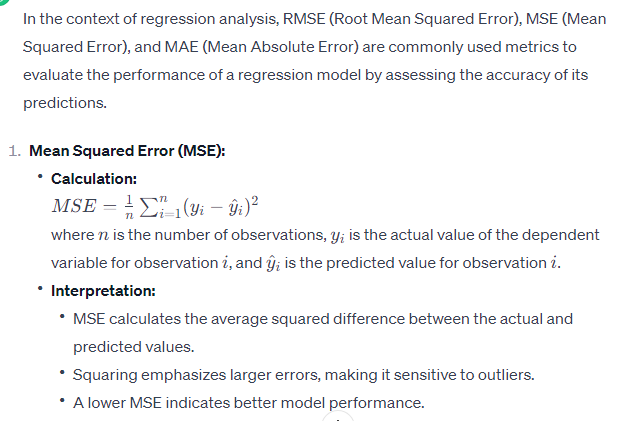
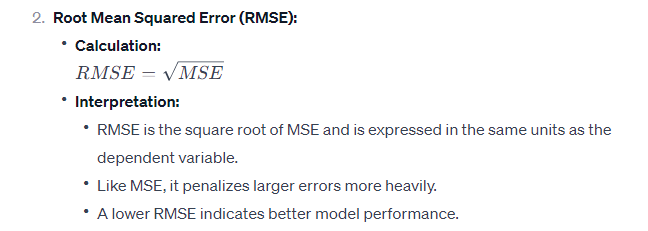
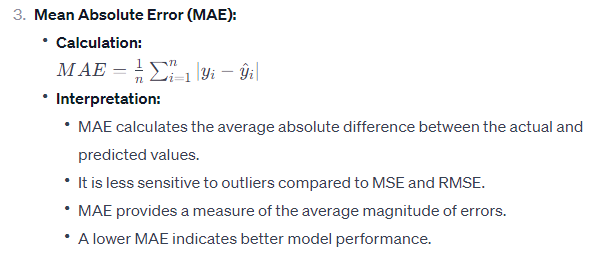
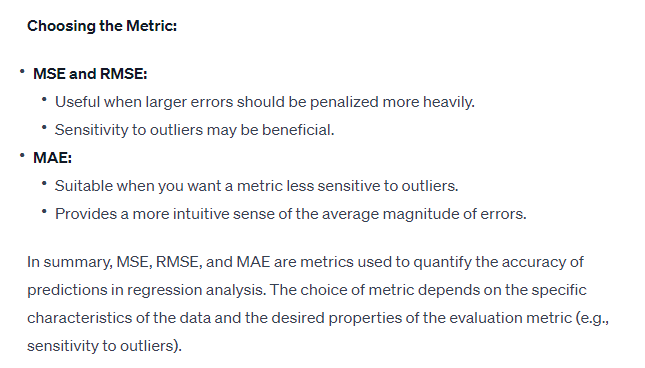

Q5. Discuss the advantages and disadvantages of using RMSE, MSE, and MAE as evaluation metrics in
regression analysis.

Ans - **Advantages and Disadvantages of RMSE, MSE, and MAE in Regression Analysis:**

**1. **Mean Squared Error (MSE):**

**Advantages:**
   - **Sensitivity to Errors:**
     - MSE penalizes larger errors more heavily, making it suitable when you want to emphasize the impact of larger deviations.
     - Useful when you want to avoid underestimating the importance of outliers.

**Disadvantages:**
   - **Sensitivity to Outliers:**
     - MSE is highly sensitive to outliers, as squaring the errors magnifies their impact.
     - Outliers can disproportionately influence the overall performance metric, leading to potential distortions.

**2. **Root Mean Squared Error (RMSE):**

**Advantages:**
   - **Sensitivity to Errors:**
     - Similar to MSE, RMSE is sensitive to larger errors, providing a balanced measure of the model's performance.
   - **Same Units as Dependent Variable:**
     - RMSE is expressed in the same units as the dependent variable, making it more interpretable.

**Disadvantages:**
   - **Sensitivity to Outliers:**
     - Like MSE, RMSE is sensitive to outliers, and the square root operation does not entirely eliminate this sensitivity.
     - Large errors can still have a significant impact on the overall metric.

**3. **Mean Absolute Error (MAE):**

**Advantages:**
   - **Robustness to Outliers:**
     - MAE is less sensitive to outliers compared to MSE and RMSE.
     - Provides a more robust measure of central tendency, as it considers the absolute values of errors.
   - **Interpretability:**
     - The interpretation of MAE is straightforward, representing the average magnitude of errors.

**Disadvantages:**
   - **Equal Weight to All Errors:**
     - MAE treats all errors equally, irrespective of their magnitude.
     - May not adequately penalize larger errors, which might be crucial in certain applications.

**General Considerations:**

- **Choice of Metric:**
  - The choice between MSE, RMSE, and MAE depends on the specific characteristics of the data and the goals of the analysis.
  - MSE and RMSE may be preferred when larger errors should be more heavily penalized.
  - MAE is suitable when you want a metric less influenced by outliers.

- **Interpretability:**
  - MAE is more interpretable as it directly represents the average magnitude of errors.
  - MSE and RMSE, while providing useful measures of performance, may not have a direct, intuitive interpretation in terms of the original units of the dependent variable.

- **Application:**
  - In some applications, the choice of metric may be dictated by practical considerations or domain-specific requirements.

In summary, the choice between MSE, RMSE, and MAE involves a trade-off between sensitivity to errors, robustness to outliers, and interpretability. The selection should be based on the specific goals of the analysis and the characteristics of the data. It is also common to consider multiple metrics to gain a comprehensive understanding of a model's performance.

Q6. Explain the concept of Lasso regularization. How does it differ from Ridge regularization, and when is
it more appropriate to use?

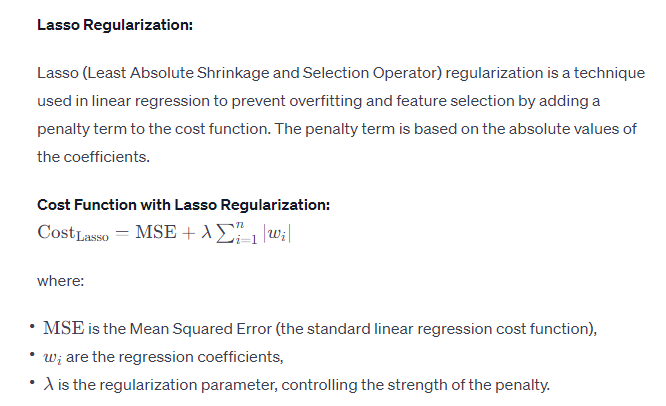
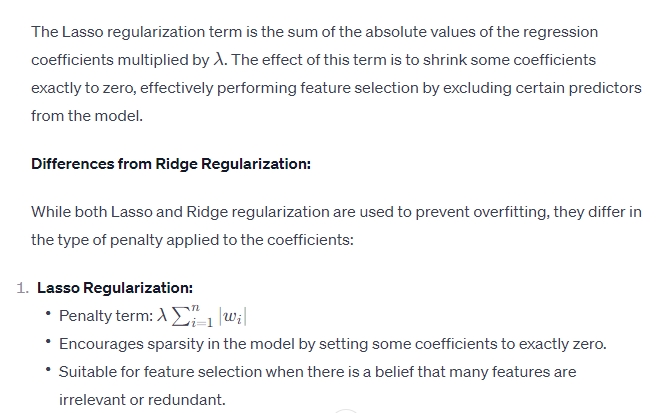
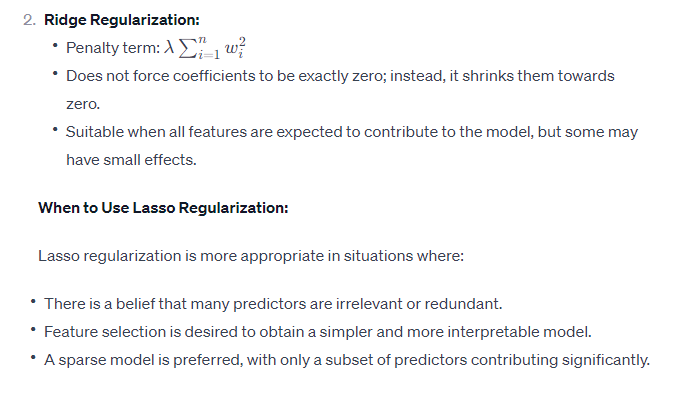
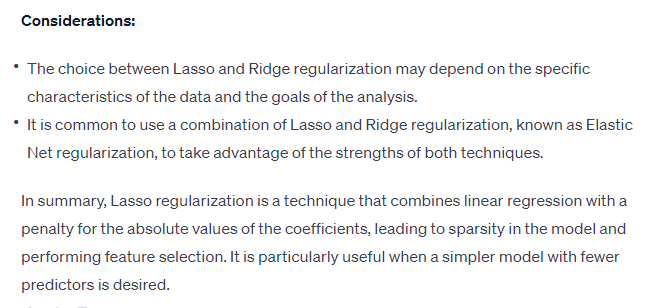

Q7. How do regularized linear models help to prevent overfitting in machine learning? Provide an
example to illustrate.

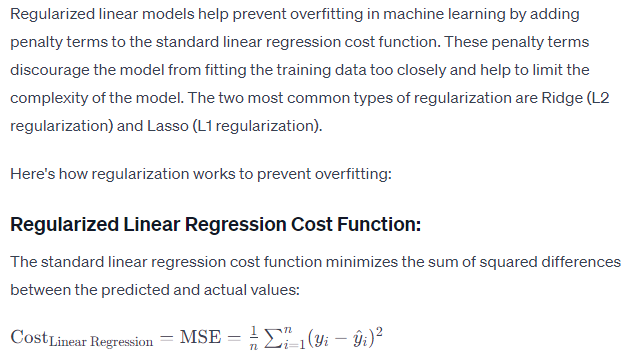
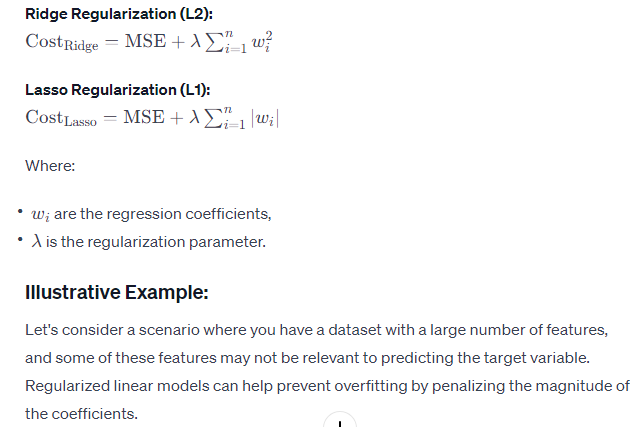

In [1]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 samples, 10 features
true_coefficients = np.random.randn(10)  # True coefficients
y = X.dot(true_coefficients) + np.random.normal(0, 0.1, size=100)  # Add noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit linear regression without regularization
linear_reg = Ridge(alpha=0)  # No regularization (alpha=0)
linear_reg.fit(X_train_scaled, y_train)

# Fit Ridge regression with L2 regularization
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# Fit Lasso regression with L1 regularization
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

# Evaluate the models
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f'MSE Linear Regression: {mse_linear}')
print(f'MSE Ridge Regression: {mse_ridge}')
print(f'MSE Lasso Regression: {mse_lasso}')


MSE Linear Regression: 0.009493683786621205
MSE Ridge Regression: 0.010354143683687698
MSE Lasso Regression: 0.1953571153673686


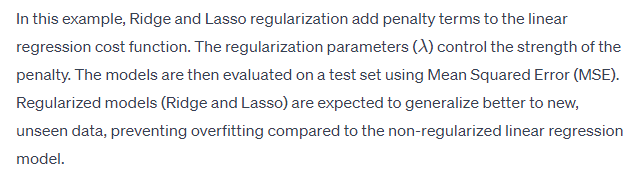

Q8. Discuss the limitations of regularized linear models and explain why they may not always be the best
choice for regression analysis.

Ans - While regularized linear models, such as Ridge and Lasso regression, offer valuable tools for preventing overfitting and feature selection, they are not always the best choice for every regression analysis. Here are some limitations and considerations associated with regularized linear models:

1. **Loss of Interpretability:**
   - Regularization methods may shrink coefficients towards zero, potentially making the model less interpretable, especially in Lasso regression where some coefficients can be exactly zero. Interpretability is crucial in certain domains or when the goal is to understand the relationships between predictors and the target variable.

2. **Sensitivity to Hyperparameter Tuning:**
   - Regularized models involve hyperparameters (e.g., \(\lambda\) in Ridge and Lasso). Selecting an appropriate value for these hyperparameters is crucial, and the performance of the model can be sensitive to their choices. In practice, hyperparameter tuning often requires cross-validation, which can be computationally expensive.

3. **Not Ideal for All Types of Data:**
   - Regularization is more beneficial when dealing with high-dimensional data, where the number of predictors is greater than the number of observations. In low-dimensional settings, regularization may not provide substantial advantages and can potentially introduce unnecessary complexity.

4. **Assumption of Linearity:**
   - Regularized linear models assume a linear relationship between predictors and the target variable. If the underlying relationship is inherently nonlinear, these models may not capture the complexity of the data, leading to suboptimal performance.

5. **Impact on Sparse Features:**
   - Lasso regression tends to yield sparse models by setting some coefficients exactly to zero. While this is useful for feature selection, it might overlook subtle but relevant information in the data if certain features are excluded.

6. **Not Robust to Outliers:**
   - Regularization methods are sensitive to outliers in the data, especially Lasso. Outliers can disproportionately influence the coefficients and may result in biased estimates.

7. **Elastic Net as an Alternative:**
   - Elastic Net combines both Lasso and Ridge regularization, offering a compromise between the two. However, it introduces an additional hyperparameter, making it more complex to tune.

8. **Feature Engineering Considerations:**
   - Regularized models do not inherently handle interactions or nonlinearities between features. Feature engineering may be necessary to capture such relationships, and alternative models like tree-based methods or neural networks might be more suitable in these cases.

9. **Computational Complexity:**
   - Solving the optimization problems associated with regularized linear models can be computationally expensive, especially when dealing with large datasets. This may limit their practicality in real-time or resource-constrained applications.

In summary, while regularized linear models are powerful tools, their application should be guided by the specific characteristics of the data, the goals of the analysis, and the trade-offs between model complexity and interpretability. Depending on the context, alternative regression methods may offer better performance and more straightforward interpretability.

Q9. You are comparing the performance of two regression models using different evaluation metrics.
Model A has an RMSE of 10, while Model B has an MAE of 8. Which model would you choose as the better
performer, and why? Are there any limitations to your choice of metric?

Ans - The choice between Model A and Model B depends on the specific goals and characteristics of the problem at hand, as well as the importance assigned to different aspects of model performance. Let's analyze the situation:

1. **RMSE of Model A:**
   - **Advantages:**
     - RMSE is sensitive to larger errors, giving more weight to outliers.
     - It provides a measure of the average magnitude of errors, considering both small and large errors.
   - **Limitations:**
     - Sensitivity to outliers may be undesirable in certain situations.
     - The square of errors might exaggerate the impact of larger errors.

2. **MAE of Model B:**
   - **Advantages:**
     - MAE is less sensitive to outliers, providing a more robust measure of central tendency.
     - It directly represents the average magnitude of errors.
   - **Limitations:**
     - It treats all errors equally, regardless of their magnitude.
     - May not adequately penalize larger errors, which could be crucial in some applications.

**Considerations for Model Selection:**

- **If Outliers Are Important:**
  - If the presence of outliers is crucial and you want the model to be more sensitive to them, Model A (with RMSE) might be preferred.

- **If Robustness to Outliers is Key:**
  - If robustness to outliers is a priority, Model B (with MAE) might be more suitable.

- **Interpretability:**
  - MAE provides a more straightforward interpretation as the average magnitude of errors, which might be desirable in scenarios where simplicity and interpretability are crucial.

- **Impact of Larger Errors:**
  - If the impact of larger errors is of great concern, Model A might be more appropriate due to its sensitivity to these errors.

- **Application-Specific Considerations:**
  - The choice between RMSE and MAE may also depend on the specific requirements and expectations of the application, as well as the preferences of stakeholders.

In summary, there is no one-size-fits-all answer to whether Model A or Model B is better. The decision should be made based on the specific context of the problem, the importance of outliers, the desired level of interpretability, and the application-specific requirements. It's also common to consider multiple metrics or conduct further analysis to gain a comprehensive understanding of model performance.

Q10. You are comparing the performance of two regularized linear models using different types of
regularization. Model A uses Ridge regularization with a regularization parameter of 0.1, while Model B
uses Lasso regularization with a regularization parameter of 0.5. Which model would you choose as the
better performer, and why? Are there any trade-offs or limitations to your choice of regularization
method?

Ans - The choice between Ridge (L2 regularization) and Lasso (L1 regularization) regularization depends on the specific characteristics of the data and the goals of the analysis. Let's analyze the situation:

**Model A (Ridge Regularization with \(\lambda = 0.1\)):**
- **Advantages:**
  - Ridge regularization tends to shrink coefficients towards zero without setting them exactly to zero.
  - It is effective when there is a suspicion that all features may contribute to the model, but some may have small effects.

- **Trade-offs:**
  - Ridge regularization may not perform feature selection as aggressively as Lasso. If some features are genuinely irrelevant, Ridge may not eliminate them entirely.

**Model B (Lasso Regularization with \(\lambda = 0.5\)):**
- **Advantages:**
  - Lasso regularization tends to yield sparse models by setting some coefficients exactly to zero.
  - It is effective for feature selection, eliminating irrelevant features.

- **Trade-offs:**
  - Lasso can be sensitive to the choice of the regularization parameter (\(\lambda\)) and may require careful tuning.
  - It may not perform as well as Ridge when all features are relevant, leading to potential exclusion of some relevant predictors.

**Considerations for Model Selection:**

- **Feature Selection:**
  - If feature selection is a priority, and there is a belief that many features are irrelevant, Model B (Lasso) might be preferred.

- **Balancing Act:**
  - If there is a balance between the desire for feature selection and the expectation that all features have some relevance, Elastic Net (a combination of Lasso and Ridge) might be considered.

- **Robustness to Multicollinearity:**
  - Ridge regularization is more robust to multicollinearity (high correlation among predictors) compared to Lasso. If multicollinearity is a concern, Ridge may be more suitable.

- **Interpretability:**
  - Lasso tends to yield sparser models, which may be more interpretable if there is a need to identify a subset of critical predictors.

- **Sensitivity to Outliers:**
  - Lasso is more sensitive to outliers compared to Ridge. If the dataset contains outliers, Ridge might be more robust.

In summary, the choice between Ridge and Lasso regularization depends on the specific characteristics of the data and the objectives of the analysis. There is no one-size-fits-all answer, and the decision should be made based on a careful consideration of the trade-offs and the goals of the modeling task. It's also common to perform hyperparameter tuning and cross-validation to find the optimal regularization strength for each method.